# The exact(optimal) steepest descent algorithm

This algorithm finds a local minimum of f(x) when given the derivative of f(x).
In each iteration, it finds the optimal step to take.

# Example
Find the local minimum of $f(x) = x_1^2 + 2x_2^2$.

In [146]:
from sympy import Symbol, Derivative,sympify
import numpy as np
import sympy as sym

In [181]:
# derivative
def getDeri(funX, xs):
    '''
    x in xs should be the symbol in the function.
    '''
    deltafunX = []
    for x in xs:
        deriv= Derivative(funX, x)
        deltafunX.append(deriv.doit())
    return(deltafunX)

# evaluate function
def evalFun(funX, xs, values):
    '''
    xs is the list of variables
    values is the list of corresponding values of the variables.
    '''
    values_dict = {}
    for i, x in enumerate(xs):
        values_dict[x] = values[i]
        
    return(funX.subs(values_dict))

# evaluate derivative function
def evalDeri(deltafunXs, xs, values):
    '''
    xs is the list of variables
    values is the list of corresponding values of the variables.
    '''
    delta = []
    for i, x in enumerate(xs):
        values_dict = {}
        values_dict[x] = values[i]
        expr = sympify(deltafunXs[i])
        ret = expr.subs(values_dict)
        delta.append(ret)
        
    return(np.array(delta))

def exact_SD(funX, deltafunX, xs):
    '''
    The exact steepest descent algorithm.
    return [x1,x2,...] where the funX reaches a local minimum
    '''
    DEBUG = False
    # initial guess
    length = len(xs)
    x = np.ones(length)
    while(True):
        f = evalFun(funX, xs, x)
        delta = evalDeri(deltafunX, xs, x)
        r = - delta
        r_sum = sum(abs(r))
        if(r_sum < 0.005):
            if(DEBUG):
                print('f: delta: r = ', f, delta, float(r_sum))
            return(x)
        t= Symbol('t')
        FunT = getFunX(x[0]+t*r[0], x[1]+t*r[1])
        detalFunT = getDeri(FunT, [t])
        EQ = sym.Eq(detalFunT[0],0)
        t = sym.solve([EQ],(t))
        t = list(t.values())[0]
    
        x = x + t*r
    
# function
def getFunX2(x1, x2):
    '''Just an example'''
    funX= x1**2 + 2*x2**2
    return funX

# DEBUG
x1= Symbol('x1')
x2= Symbol('x2')
xs = [x1, x2]
funX = getFunX(x1, x2)
print('funX:',funX)
deltafunX = getDeri(funX, xs)
print('derivative:', deltafunX)
x = np.array([1,1])
f = evalFun(funX, xs, x)
print('f:', f)
delta = evalDeri(deltafunX, xs, x)
print(delta)
# END

funX: x1**2 + 2*x2**2
derivative: [2*x1, 4*x2]
f: 3
[2 4]


In [182]:
x1= Symbol('x1')
x2= Symbol('x2')
xs = [x1, x2]
funX = getFunX2(x1, x2)
print('funX:',funX)
deltafunX = getDeri(funX, xs)
print('derivative:', deltafunX)
ret = exact_SD(funX, deltafunX, xs)
print(ret)

funX: x1**2 + 2*x2**2
derivative: [2*x1, 4*x2]
[0.000406442107402327 0.000406442107402327]


In [187]:
def getFunX3(x1, x2, x3):
    '''Just an example'''
    funX= x1**2 + 2*x2**2 + 0.5*x3**2
    return funX

x1= Symbol('x')
x2= Symbol('y')
x3= Symbol('z')
xs = [x1, x2, x3]
funX = getFunX3(x1, x2, x3)
print('funX:',funX)
deltafunX = getDeri(funX, xs)
print('derivative:', deltafunX)
ret = exact_SD(funX, deltafunX, xs)
print(ret)

funX: x**2 + 2*y**2 + 0.5*z**2
derivative: [2*x, 4*y, 1.0*z]
[7.34200829642852e-8 -1.83550207410707e-8 0.00403828247465437]


# The e-step steepest descent algorithm

In [194]:
def e_SD(funX, deltafunX, xs, e):
    '''
    The e-step steepest descent algorithm.
    return [x1,x2,...] where the funX reaches a local minimum
    '''
    DEBUG = False
    # initial guess
    length = len(xs)
    x = np.ones(length)
    while(True):
        f = evalFun(funX, xs, x)
        delta = evalDeri(deltafunX, xs, x)
        r = - delta
        r_sum = sum(abs(r))
        if(r_sum < 0.005):
            if(DEBUG):
                print('f: delta: r = ', f, delta, float(r_sum))
            return(x)
        x = x + e*r

In [199]:
x1= Symbol('x1')
x2= Symbol('x2')
xs = [x1, x2]
funX = getFunX2(x1, x2)
print('funX:',funX)
deltafunX = getDeri(funX, xs)
print('derivative:', deltafunX)
ret = e_SD(funX, deltafunX, xs, 0.1)
print(ret)

funX: x1**2 + 2*x2**2
derivative: [2*x1, 4*x2]
[0.00241785163922926 1.02349036907747e-6]


# Premilary

In [188]:
x = 1
eval("2*x+1")

In [189]:
import numpy as np
from scipy.optimize import fsolve

def myFunction(z):
   x = z[0]
   y = z[1]
   w = z[2]

   F = np.empty((3))
   F[0] = x**2+y**2-20
   F[1] = y - x**2
   F[2] = w + 5 - x*y
   return F

zGuess = np.array([1,1,1])
z = fsolve(myFunction,zGuess)
print(z)

[2. 4. 3.]


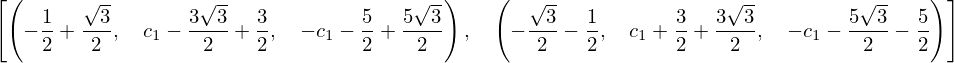

In [190]:
import sympy as sym
sym.init_printing()
x,y,z = sym.symbols('x,y,z')
c1 = sym.Symbol('c1')

f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)

sym.solve([f,g,h],(x,y,z))

In [191]:
sym.init_printing()
t= sym.symbols('t')
f = sym.Eq(-4+8*t-16+64*t,0)

t = sym.solve([f],(t))
t = list(t.values())[0]
print(t)

5/18


In [192]:
from sympy import Symbol, Derivative

x= Symbol('x')

function= x**4 + 7*x**3 + 8

deriv= Derivative(function, x)
deriv.doit()